In [ ]:
from scipy.fft import fft, fftfreq, ifftn, fftn, fft2, fftshift, rfft, rfftfreq
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# giving directory name
dirname = '/content/drive/MyDrive/Colab Notebooks/'

# giving file extension
ext = ('.png')

# iterating over all files
for files in os.listdir(dirname):
    if files.endswith(ext):
        print(dirname + files)  # printing file name of desired extension
    else:
        continue


/content/drive/MyDrive/Colab Notebooks/e.png
/content/drive/MyDrive/Colab Notebooks/a.png
/content/drive/MyDrive/Colab Notebooks/c.png
/content/drive/MyDrive/Colab Notebooks/b.png
/content/drive/MyDrive/Colab Notebooks/d.png
/content/drive/MyDrive/Colab Notebooks/b2.png
/content/drive/MyDrive/Colab Notebooks/e2.png
/content/drive/MyDrive/Colab Notebooks/f.png
/content/drive/MyDrive/Colab Notebooks/g.png


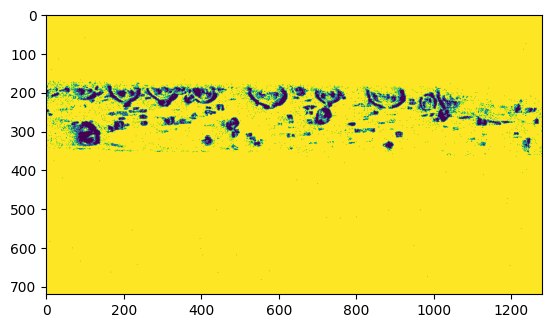

In [ ]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/f.png',0)
plt.imshow(img)

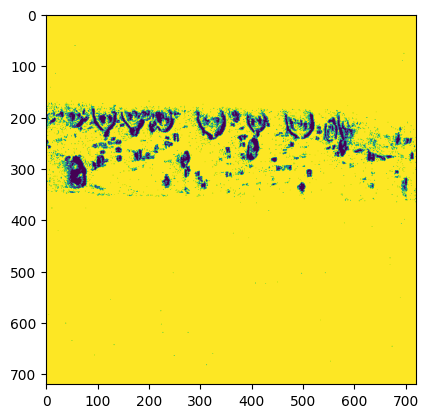

In [ ]:
img = cv2.resize(img, (img.shape[0], img.shape[0]))
plt.imshow(img)

In [ ]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

0.2994969079092901
0.47618970261460414
0.1791985825734348


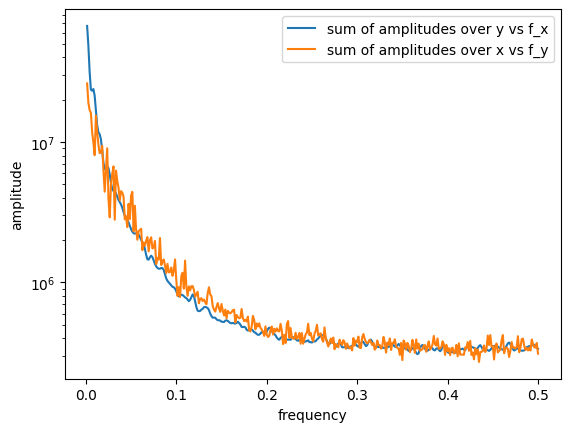

In [ ]:
import math
from scipy.stats import linregress
n = img.shape[0]
# We use rfft since we are processing real values
a = rfft(img,img.shape[0], axis=0)

# Sum power along the second axis
a = a.real*a.real + a.imag*a.imag
a = a.sum(axis=1)/a.shape[1]

# Generate a list of frequencies
f = rfftfreq(n)
n5 = n // 5
# Graph it
plt.plot(f[1:],a[1:], label = 'sum of amplitudes over y vs f_x')
print(signaltonoise(a[1:]))

# Fourier Transform along the second axis

# Same steps as above
n = img.shape[1]

a2 = rfft(img,img.shape[1],axis=1)

a2 = a2.real*a2.real + a2.imag*a2.imag
a2 = a2.sum(axis=0)/a2.shape[0]

f2 = rfftfreq(n)
n5 = n // 5
plt.plot(f2[1:],a2[1:],  label ='sum of amplitudes over x vs f_y')
print(signaltonoise(a2[1:]))


plt.ylabel( 'amplitude' )
plt.xlabel( 'frequency' )
plt.yscale( 'log' )

plt.legend()

stda = (np.abs(a[1:] - a2[1:]))
print(signaltonoise(stda))

In [ ]:
from scipy import stats
def spectra(img):
  print(img.shape)
  n = img.shape[0]
  # We use rfft since we are processing real values
  a = rfft(img,img.shape[0], axis=0)

  # Sum power along the second axis
  a = a.real*a.real + a.imag*a.imag
  a = a.sum(axis=1)/a.shape[1]

  # Generate a list of frequencies
  f = rfftfreq(n)

  # Graph it
  #plt.plot(f[1:],a[1:], label = 'sum of amplitudes over y vs f_x')
  print(np.log(a[-1]))

  tempX = (signaltonoise(a[1:]))
  # Fourier Transform along the second axis

  # Same steps as above
  n = img.shape[1]

  a = rfft(img,img.shape[1],axis=1)

  a = a.real*a.real + a.imag*a.imag
  a = a.sum(axis=0)/a.shape[0]

  f = rfftfreq(n)

  plt.plot(f[1:],a[1:],  label ='sum of amplitudes over x vs f_y')
  slope1, intercept1, r_value, p_value, std_err1 = stats.linregress(f[200:],a[200:])

  #plt.plot(f[100:], y)
  #plt.plot(f[1:],a[1:])
  tempY = (signaltonoise(a[1:]))

  return tempX, tempY

(768, 1024)
12.376022763631983
X:0.35727786655218063, Y:0.3925860990084118

(768, 1024)
12.393021844949201
X:0.37765410017734935, Y:0.2542265570052434

(768, 1024)
12.208115966683165
X:0.2863020774511693, Y:0.21498337946947704

(768, 1024)
11.294672887421521
X:0.19713472945180607, Y:0.22685345881138658

(768, 1024)
13.494526969296764
X:0.56259126585343, Y:0.653847419617722

(720, 1280)
13.073926894822815
X:0.3318556194695813, Y:0.39485595958046454

(768, 1024)
13.118176940948322
X:0.2145171506724077, Y:0.22258745742194505



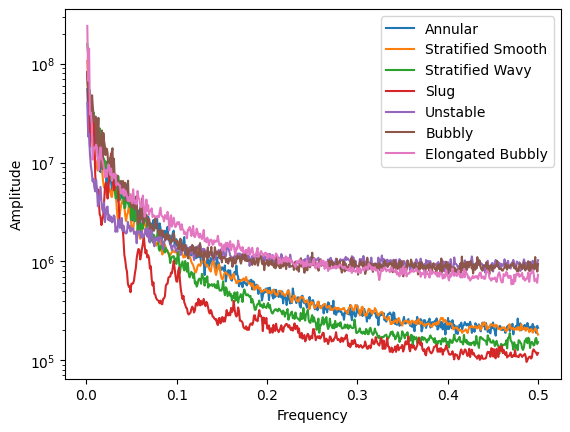

In [ ]:
import matplotlib

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/a.png',0)
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/b.png',0)
img3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/c.png',0)
img4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/d.png',0)
img5 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/e.png',0)
img6 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/f.png',0)
img7 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/e2.png',0)
x,y = spectra(img)
print(f"X:{x}, Y:{y}\n")
x,y = spectra(img2)
print(f"X:{x}, Y:{y}\n")
x,y = spectra(img3)
print(f"X:{x}, Y:{y}\n")
x,y = spectra(img4)
print(f"X:{x}, Y:{y}\n")
x,y = spectra(img5)
print(f"X:{x}, Y:{y}\n")
x,y = spectra(img6)
print(f"X:{x}, Y:{y}\n")
x,y = spectra(img7)
print(f"X:{x}, Y:{y}\n")

from matplotlib import font_manager
font = {
    'weight' : 'medium',
    'size'   : 10,
    'style'  : 'normal'}

plt.ylabel( 'Amplitude' )
plt.xlabel( 'Frequency' )
plt.yscale( 'log' )

plt.legend(['Annular','Stratified Smooth', 'Stratified Wavy', 'Slug', 'Unstable', 'Bubbly', 'Elongated Bubbly'])


9
(768, 1024)
13.494526969296764
[0.56259126585343, 0.653847419617722]
(768, 1024)
12.376022763631983
[0.35727786655218063, 0.3925860990084118]
(768, 1024)
12.208115966683165
[0.2863020774511693, 0.21498337946947704]
(768, 1024)
12.393021844949201
[0.37765410017734935, 0.2542265570052434]
(768, 1024)
11.294672887421521
[0.19713472945180607, 0.22685345881138658]
(768, 1024)
11.65764706478824
[0.4681247579125289, 0.28187740555689134]
(768, 1024)
13.118176940948322
[0.2145171506724077, 0.22258745742194505]
(720, 1280)
13.073926894822815
[0.3318556194695813, 0.39485595958046454]
(720, 1280)
14.12085478494024
[0.35026829081507843, 0.7317489472787723]
          x         y
0  0.562591  0.653847
1  0.357278  0.392586
2  0.286302  0.214983
3  0.377654  0.254227
4  0.197135  0.226853
5  0.468125  0.281877
6  0.214517  0.222587
7  0.331856  0.394856
8  0.350268  0.731749


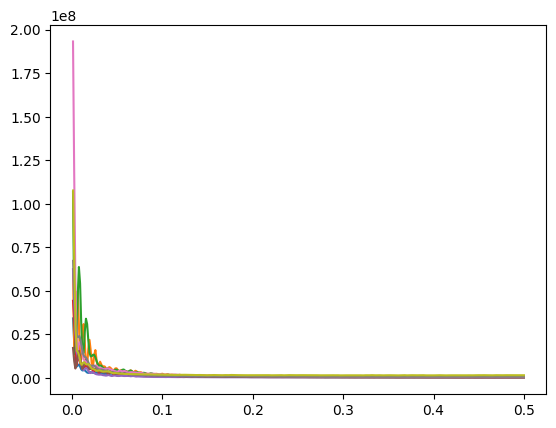

In [ ]:
import os

# giving directory name
dirname = '/content/drive/MyDrive/Colab Notebooks/'

# giving file extension
ext = ('.png')

count = 0
for files in os.listdir(dirname):
    if files.endswith(ext):
        count = count+1
    else:
        continue

print(count)


final = np.zeros((count,2))

# iterating over all files
i = 0
for files in os.listdir(dirname):
    if files.endswith(ext):
        img = cv2.imread(dirname + files, 0)
        x,y = spectra(img)
        print(f"[{x}, {y}]")
        final[i] = [x,y]
        i = i + 1
    else:
        continue


final = pd.DataFrame(final, columns=['x', 'y'])
print(final)

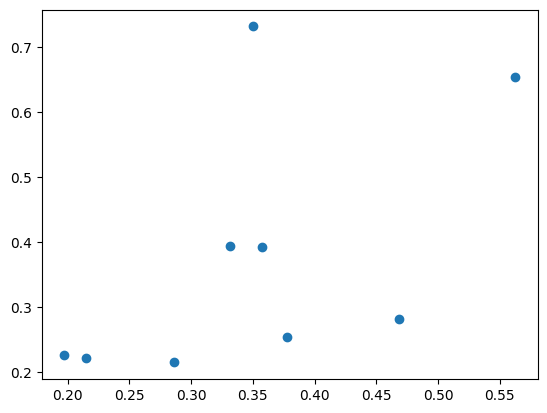

In [ ]:
plt.scatter(final['x'], final['y'])